# Veri Seti Analizi

## Öğrenci Performansı Veri Seti

• Student ID: Her öğrenci için benzersiz bir tanımlayıcı

• Gender: Öğrencinin cinsiyeti (erkek/kız)

• Race/ethnicity: Öğrencinin ırksal veya etnik kökeni (Asyalı, Afrikalı-Amerikalı, Hispanik vb.)

• Parental level of education: Öğrencinin ebeveyn(ler)i veya veli(ler)inin ulaştığı en yüksek eğitim düzeyi

• Lunch: Öğrencinin ücretsiz veya indirimli öğle yemeği alıp almadığı (evet/hayır)

• Test preparation course: Öğrencinin bir sınava hazırlık kursu (evet/hayır)

• Math score:Öğrencinin standart bir matematik testindeki puanı

• Reading score: Öğrencinin standart bir okuma testindeki puanı

• Writing score: Öğrencinin standart bir yazma testindeki puanı

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv("StudentperformanceİnMathematics.csv")
df_copy = df.copy()

copy() veri setini kopyalar.

## Verinin anlaşılması ve açıklanması

head() -Veri setinin ilk n satırı okur.(default degeri 5 dir)

In [8]:
df_copy.head()

,Student ID,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
0,1,Female,Group B,Bachelor's degree,Yes,Completed,72,72,74
1,2,Female,Group C,Some college,No,None,69,90,88
2,3,Female,Group B,Master's degree,No,Completed,90,95,93
3,4,Male,Group A,Associate's degree,Yes,None,47,57,44
4,5,Male,Group C,Some college,Yes,None,76,78,75


tail() -Veri setinin son n satırı okur.(default degeri 5 dir)

In [9]:
df_copy.tail()

,Student ID,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score
202,203,Female,Group D,Some college,No,None,62,65,61
203,204,Male,Group C,Some high school,Yes,None,67,70,68
204,205,Female,Group B,Bachelor's degree,No,Completed,92,94,93
205,206,Male,Group C,High school,Yes,None,63,58,58
206,207,Female,Group D,High school,Yes,None,54,59,52


shape - Verisetimizin kolon(sütun) ve satır sayısını getirir yapısını-şeklini verir

In [10]:
df_copy.shape

(207, 9)

df_copy.index - Verisetimizin kaç adet indexi olduğunu verir kaçtan başlamış kaçta bitmiş onu verir

In [11]:
df_copy.index

RangeIndex(start=0, stop=207, step=1)

df_copy.columns - Kolonları getirir

In [12]:
df_copy.columns

Index(['Student ID', 'Gender', 'Race/ethnicity', 'Parental level of education',
       'Lunch', 'Test preparation course', 'Math score', 'Reading score',
       'Writing score'],
      dtype='object')

df_copy.size - Verisetindeki toplam kaç adet hücre(element vb.) varsa getirir

In [13]:
df_copy.size

1863

df_copy.describe() - Verisetimiz hakkında bazı işlemleri yapmış bir şekilde verir (mean,min,max,std vb.)

In [14]:
df_copy.describe()

,Student ID,Math score,Reading score,Writing score
count,207.000000,207.000000,207.000000,207.000000
mean,104.000000,69.207729,69.898551,68.971014
std,59.899917,13.528838,14.960607,15.843259
min,1.000000,38.000000,38.000000,35.000000
25%,52.500000,59.500000,59.000000,57.000000
50%,104.000000,69.000000,70.000000,70.000000
75%,155.500000,79.000000,80.000000,80.000000
max,207.000000,98.000000,100.000000,100.000000


df_copy.describe().T - describe() fonksiyonun Transpose yapar ve daha hoş bir görüntü verir

In [15]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Student ID,207.0,104.000000,59.899917,1.0,52.5,104.0,155.5,207.0
Math score,207.0,69.207729,13.528838,38.0,59.5,69.0,79.0,98.0
Reading score,207.0,69.898551,14.960607,38.0,59.0,70.0,80.0,100.0
Writing score,207.0,68.971014,15.843259,35.0,57.0,70.0,80.0,100.0


df_copy.dtypes - Verisetimizin kolon tiplerini verir

In [16]:
df_copy.dtypes

Student ID                      int64
Gender                         object
Race/ethnicity                 object
Parental level of education    object
Lunch                          object
Test preparation course        object
Math score                      int64
Reading score                   int64
Writing score                   int64
dtype: object

df_copy.info() - Birçok bilgi verir veriseti hakkında

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Student ID                   207 non-null    int64 
 1   Gender                       207 non-null    object
 2   Race/ethnicity               207 non-null    object
 3   Parental level of education  207 non-null    object
 4   Lunch                        207 non-null    object
 5   Test preparation course      207 non-null    object
 6   Math score                   207 non-null    int64 
 7   Reading score                207 non-null    int64 
 8   Writing score                207 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 14.7+ KB


df_copy.corr() - İki rassal değişken arasındaki istatistiksel ilişkiye korelasyon adı verilir. Korelasyon keşifçi veri analizinin en önemli ve temel adımlarından biridir.

In [41]:
df_copy.corr()

,Student ID,Math score,Reading score,Writing score
Student ID,1.000000,-0.132589,-0.127299,-0.147476
Math score,-0.132589,1.000000,0.920590,0.938897
Reading score,-0.127299,0.920590,1.000000,0.983069
Writing score,-0.147476,0.938897,0.983069,1.000000


df_copy.nunique() - Her sütunda eşsiz olan kaç veri var adedini getirir NaN değerleri saymaz

In [22]:
df_copy.nunique()

Student ID                     207
Gender                           2
Race/ethnicity                   5
Parental level of education      6
Lunch                            2
Test preparation course          2
Math score                      55
Reading score                   58
Writing score                   59
dtype: int64

## Verinin Temizlenmesi ve Ön İşlemesi

count() - Her kolonun(sütunun) dolu olan hücrelerini sayar sütün-sütun veri verir,ancaaak eksik veri(NaN,null) olanları saymaz

In [24]:
df_copy.count()

Student ID                     207
Gender                         207
Race/ethnicity                 207
Parental level of education    207
Lunch                          207
Test preparation course        207
Math score                     207
Reading score                  207
Writing score                  207
dtype: int64

df_copy.isnull().values.any() - Verisetinde eksik veri var mı yok mu diye sorar ve boolean dönderir

In [25]:
df_copy.isnull().values.any()

False

df_copy.isnull().sum() - Her kolonda eksik veri var mı varsa kaç adet onu getirir

In [26]:
df_copy.isnull().sum()

Student ID                     0
Gender                         0
Race/ethnicity                 0
Parental level of education    0
Lunch                          0
Test preparation course        0
Math score                     0
Reading score                  0
Writing score                  0
dtype: int64

df_copy.isnull().sum().sum() - Verisetindeki toplam eksik değer sayısını verir

In [29]:
df_copy.isnull().sum().sum()

0

In [59]:
df_copy["Mean"] = (df_copy["Math score"] + df_copy["Reading score"] + df_copy["Writing score"]) / 3

In [60]:
df_copy["Mean"]

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
202    62.666667
203    68.333333
204    93.000000
205    59.666667
206    55.000000
Name: Mean, Length: 207, dtype: float64

Başarı ortalamalarını almak için mean adında yeni değişken oluşturup Math score,Reading score,Writing scorelarını toplayarak 3e böldük.

Şimdi ise başarı durumu diye bir değişken oluşturup başarı ortalaması 65den küçük olanlara başarısız anlamına gelecek 0 sayısını verelim 65den fazla olanlarada başarılı anlamına gelecek 1 sayısını verelim

In [75]:
df_copy["Success"] = [ 0 if i < 65 else  1 for i in df_copy["Mean"]]

Success adında değişken oluşturarak başarı durumunu 0 ve 1 olarak veri setimize eklemiş olduk.

In [78]:
df_copy

,Student ID,Gender,Race/ethnicity,Parental level of education,Lunch,Test preparation course,Math score,Reading score,Writing score,Mean,Success
0,1,Female,Group B,Bachelor's degree,Yes,Completed,72,72,74,72.666667,1
1,2,Female,Group C,Some college,No,None,69,90,88,82.333333,1
2,3,Female,Group B,Master's degree,No,Completed,90,95,93,92.666667,1
3,4,Male,Group A,Associate's degree,Yes,None,47,57,44,49.333333,0
4,5,Male,Group C,Some college,Yes,None,76,78,75,76.333333,1
...,...,...,...,...,...,...,...,...,...,...,...
202,203,Female,Group D,Some college,No,None,62,65,61,62.666667,0
203,204,Male,Group C,Some high school,Yes,None,67,70,68,68.333333,1
204,205,Female,Group B,Bachelor's degree,No,Completed,92,94,93,93.000000,1
205,206,Male,Group C,High school,Yes,None,63,58,58,59.666667,0


In [83]:
df_copy.groupby("Gender")["Success"].mean()

Gender
Female    0.761905
Male      0.480392
Name: Success, dtype: float64

Kadınların başarı oranı %76 iken Erkeklerin başarı oranı %48miş.

In [84]:
df_copy.groupby("Race/ethnicity")["Success"].mean()

Race/ethnicity
Group A    0.714286
Group B    0.666667
Group C    0.631579
Group D    0.557692
Group E    0.620690
Name: Success, dtype: float64

Group A %71 Group B %66 Group C %63 Group D %55 Group E %62 başarı oranına sahip grupların başarı sıralaması A-B-C-E-D şeklinde.

In [85]:
df_copy.groupby("Test preparation course")["Success"].mean()

Test preparation course
Completed    0.915789
None         0.375000
Name: Success, dtype: float64

Kursa gidenler gitmeyenlere oranla çok daha başarılı olma şansına sahip olmuş.

In [86]:
df_copy.groupby("Parental level of education")["Success"].mean()

Parental level of education
Associate's degree    0.703704
Bachelor's degree     0.913043
High school           0.422222
Master's degree       1.000000
Some college          0.704918
Some high school      0.454545
Name: Success, dtype: float64

Burdan anladığımız ise ebeveynlerin eğitim seviyesi ne kadar artarsa öğrencinin başarılı olma durumu bir o kadar artmış.

In [87]:
df_copy.groupby(["Gender","Test preparation course","Race/ethnicity","Parental level of education"])["Success"].mean()

Gender  Test preparation course  Race/ethnicity  Parental level of education
Female  Completed                Group A         High school                    1.000000
                                                 Some college                   1.000000
                                 Group B         Associate's degree             1.000000
                                                 Bachelor's degree              1.000000
                                                 High school                    1.000000
                                                                                  ...   
Male    None                     Group D         Some high school               0.000000
                                 Group E         Bachelor's degree              0.500000
                                                 High school                    0.166667
                                                 Some college                   0.000000
                                 

## Veri Setini Grafikleştirerek Anlama

In [88]:
df_copy["Gender"].value_counts()

Female    105
Male      102
Name: Gender, dtype: int64

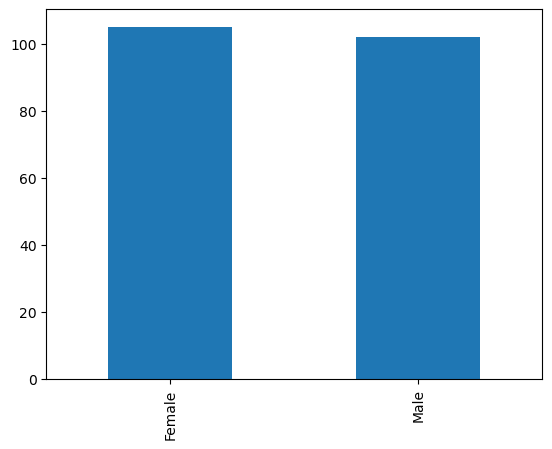

In [90]:
df_copy["Gender"].value_counts().plot(kind="bar");

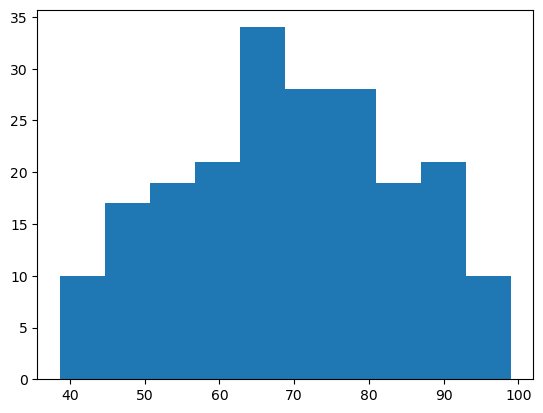

In [94]:
plt.hist(df_copy["Mean"]);

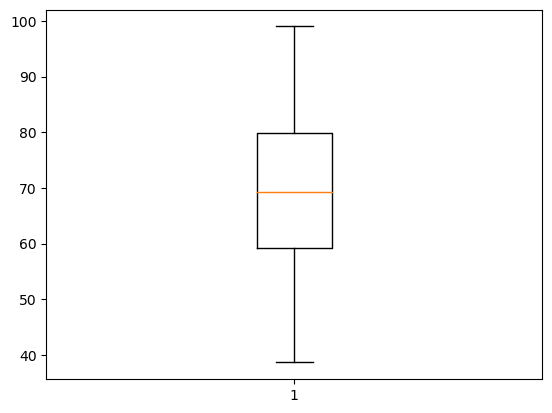

In [95]:
plt.boxplot(df_copy["Mean"]);

<AxesSubplot:xlabel='Success', ylabel='count'>

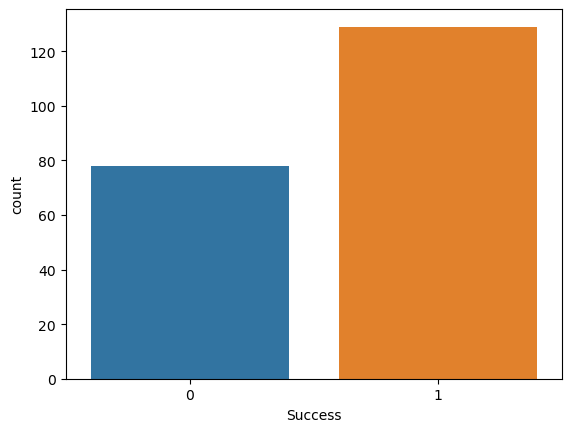

In [96]:
sns.countplot(x=df_copy["Success"],data=df)

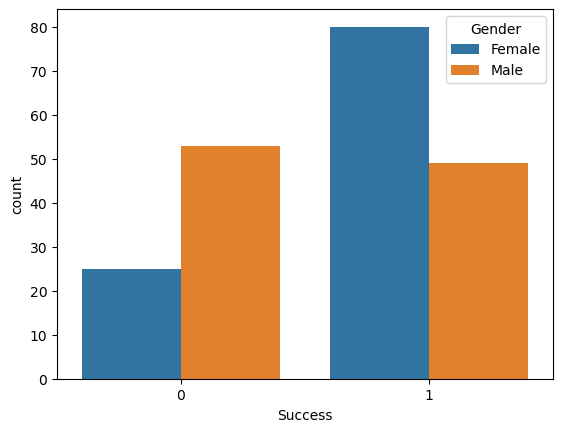

In [99]:
sns.countplot(x=df_copy["Success"],data=df_copy,hue="Gender");

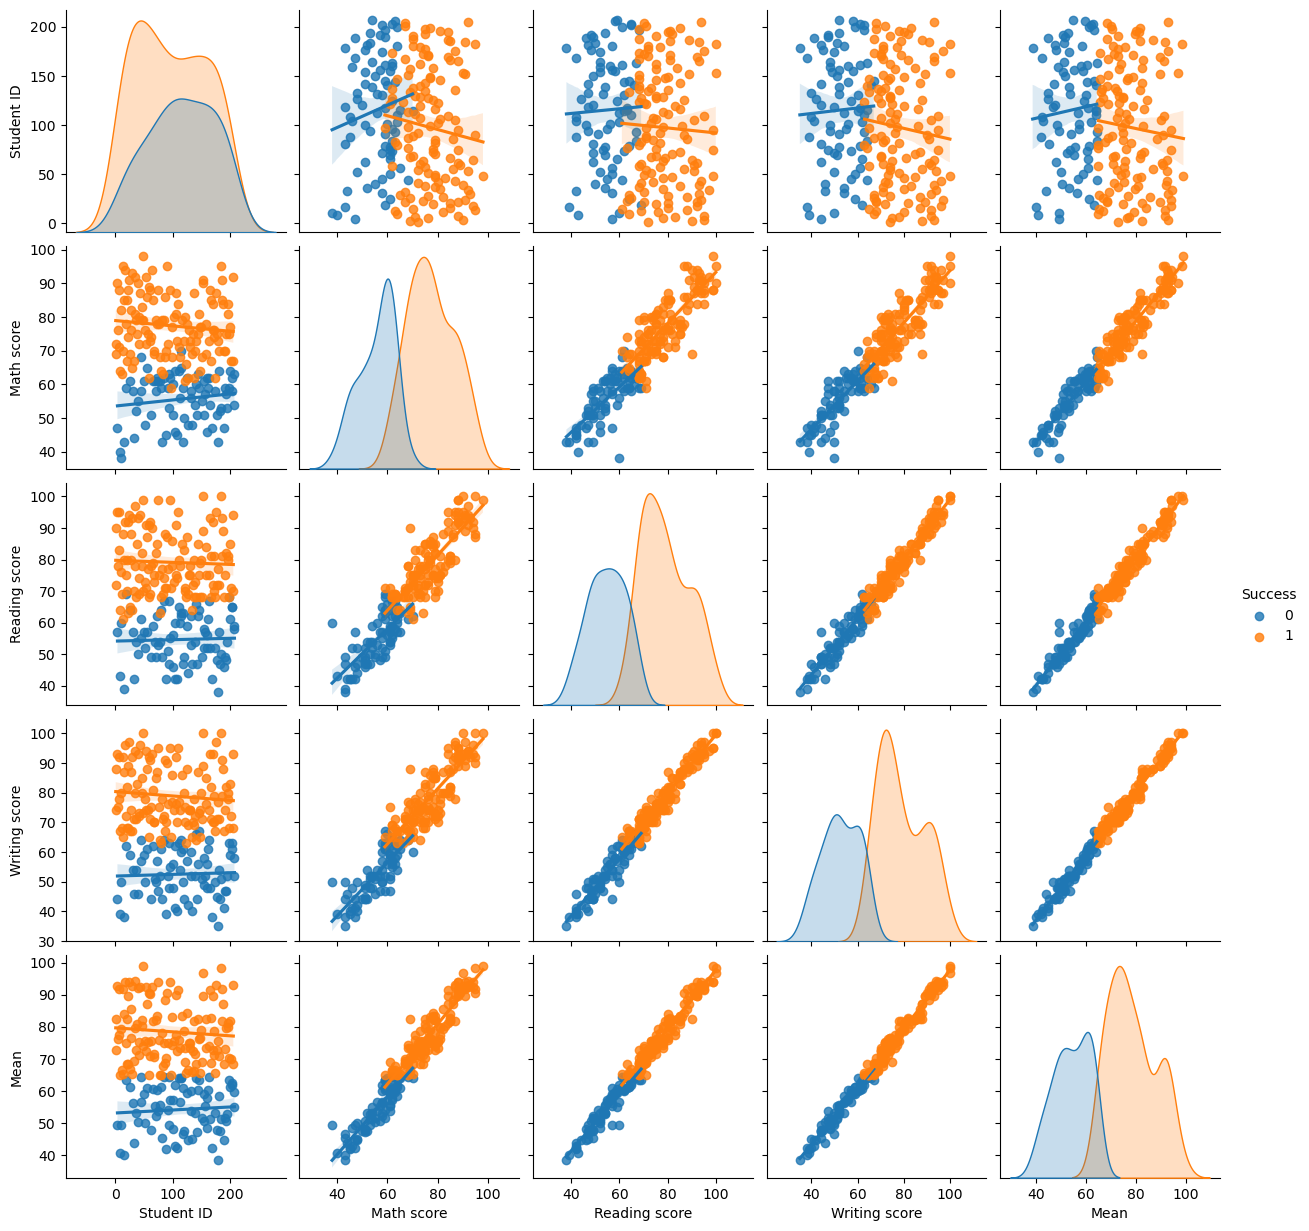

In [106]:
sns.pairplot(df_copy,kind="reg",hue="Success")